# Lab 8 Notebook
written by Corey Beard and Marshall Campbell ccbeard@uci.edu marsaac@uci.edu

This notebook will attempt to simulate Physics 52C Lab 8. Certain cells will be editable, and are meant to mimic students adjusting settings on laboratory equipment. Certain cells are uneditable, and are meant to simulate nature, producing values as read by your instrument, depending on your settings.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random
import scipy.stats as scipy
import scipy.optimize as optimization
from scipy.optimize import curve_fit

## 1.4.2 Preliminaries

This next cell will imitate a compass, used to determine the direction of Earth's magnetic field.

In [2]:
#Compass
magdir = 28 + np.random.normal(2)

print(magdir)

31.141496957597013


In [3]:
#Have this cell spit out a helmholtz coil radius

Rlab = np.round(0.64+np.random.normal(0,0.005),3)

print('Radius of the Helmholtz Coil')
print(Rlab)

Radius of the Helmholtz Coil
0.638


This next cell is for changing the settings on your equipment. You should not have to change anything in the following cell.

In [4]:
##########################
##    Settings    ########
##########################

#The angle of the plane of the electron beam
Beam_Angle = 0

#Anode Voltage (in Volts)
Anode_Voltage = 140.0

#Current through the Helmholtz Coil (in Amperes)
Coil_Current = 1.2

#The angle of the plane of the Helmholtz Coil
Coil_Angle = 0


This next cell represents the physics of the experiment, and **should not be edited.**

In [5]:
e = 1.6021*10**(-19) #correct electron charge
me = 9.1093*10**(-31) #correct electron mass (kg)
R = 0.64 #radius of the coils
n = 130 #number of turns in the coils 
mu0 = 4*np.pi*10**(-7) #permeability of free space  (in unit Tesla-m/Amp)
B = mu0*Coil_Current*n/((5/4)**(3/2)*R) #magnetic field of the coils
r = np.sqrt(2*Anode_Voltage/(B**2)*(me/e)) #radius of the electron beam
def measure_r():
    global rlab
    Blab = mu0*Coil_Current*n/((5/4)**(3/2)*Rlab) #magnetic field of the coils (should be in Tesla)
    rlab = np.sqrt(2*Anode_Voltage/(Blab**2)*(me/e)) + np.random.normal(0,0.005) #radius of the electron beam
#     print('Electron Beam Radius = {}'.format(rlab))
def diceroll():
    global N
    N = random.randint(1,6)
#     print('Dice reads: {}'.format(N))

## 8.4.2 Database
*Goal: Compile a V, I , N, $\rho$ database*

Tabulate 16 measurements of the accelerating voltage, coil current, number on the die, and electron-beam radius. Choose four values of voltage with a large variation of values (e.g., 115, 140, 165, 190 V) and four values of current with a large variation in values. **Do not exceed 200 V for the voltage across the grid of 1.5 A for the current through the coil!** For each value of V and I, measure $\rho$; also roll the die and enter the number N in your table.

In [6]:
#Anode Voltage (in Volts)
Anode_Voltage = 115

#Current through the Helmholtz Coil (in Amperes)
Coil_Current = 1.5

#Electron beam radius:
measure_r()

#Roll of the dice:
diceroll()

In [7]:
Vlist = []
Ilist = []
rlist = []
Dlist = []
for i in range(4):
    for j in range(4):
        Anode_Voltage = 115 + i*25
        Vlist.append(Anode_Voltage)
        
        Coil_Current = 0.6 + j*0.3
        Ilist.append(Coil_Current)
        
        measure_r()
        diceroll()
        rlist.append(rlab)
        Dlist.append(N)
        
        df = pd.DataFrame({'Voltage (V)':Vlist,'Current (A)':Ilist,'e-beam radius (m)':rlist,'Dice roll':Dlist})
df

,Voltage (V),Current (A),e-beam radius (m),Dice roll
0,115,0.6,0.330680,1
1,115,0.9,0.226981,4
2,115,1.2,0.168428,1
3,115,1.5,0.130092,4
4,140,0.6,0.367428,4
5,140,0.9,0.236498,5
6,140,1.2,0.177544,4
7,140,1.5,0.145939,2
8,165,0.6,0.394664,3
9,165,0.9,0.261451,3


## 8.4.3 Regression analysis
*Goal: Analyze your database.*

In the following section you will prepare a number of graphs and calculations. You may complete this in any software package you prefer (e.g. mathematica, matlab, excel)

**1. Graph $\rho$ versus each of the three independent variables: V, I, and N. Calculate the correlation coefficient r in each case.**

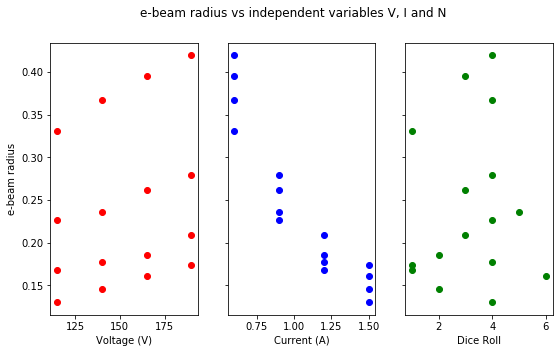

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(9,5))

x1 = Vlist
x2 = Ilist
x3 = Dlist
y = rlist

ax1.plot(x1,y,'ro')
ax2.plot(x2,y,'bo')
ax3.plot(x3,y,'go')

ax1.set_xlabel('Voltage (V)')
ax2.set_xlabel('Current (A)')
ax3.set_xlabel('Dice Roll')
ax1.set_ylabel('e-beam radius')

fig.suptitle('e-beam radius vs independent variables V, I and N')
plt.show()

Correlation of $\rho$ with other three variables. Taylor Appendix C shows how to calculate these. See also Lab 6 notebook. Below we reproduce with built-in tools. This is not a replacement for Appendix C based calculation.

**In space below estimate r correlation coefficient for three plots shown above (used Appendix C).**

These are built-in tool for reference, correlation and T-statistic probability:

In [1]:
x=rlist
y=Vlist

r,p=scipy.pearsonr(x,y)
print('built-in tools r on rho vs V',r)
print('built-in tools probability on rho vs V as a %',p*100)

x=rlist
y=Ilist
r,p=scipy.pearsonr(x,y)
print('built-in tools r on rho vs I',r)
print('built-in tools probability on rho vs I as a %',p*100)

x=rlist
y=Dlist
r,p=scipy.pearsonr(x,y)
print('built-in tools r on rho vs D',r)
print('built-in tools probability on rho vs D as a %',p*100)

NameError: name 'rlist' is not defined

From above note that any probability that is less than 5% is a "significant" correlation - below 1% is a "highly significant" correlation. See the discussion in Appendix C and slides abd videos from Lecture 6.

You will see that correlation of rho vs I is the most significant. rho vs N (number from random dice throw) is least - in fact non existant.

**2. Graph V versus I and calculate the correlation coefficient r**

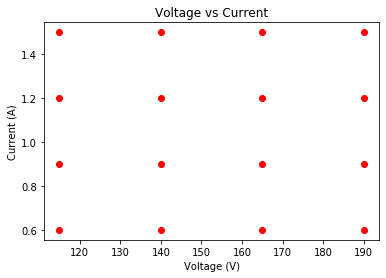

In [10]:
fig, ax = plt.subplots()

V=Vlist
I=Ilist

#V = np.array([115, 140, 165, 190])
#I = np.array([0.6, 0.9, 1.2, 1.5])

ax.errorbar(V,I,xerr=0,yerr=0,fmt='ro')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')
ax.set_title('Voltage vs Current')
plt.show()

Correlation of $\rho$ with V and I. Taylor Appendix C shows how to calculate these. See also Lab 6 notebook. 

**The cell below is provided for calculation of the correlation coefficient make use of Appendix C:**

Below we reproduce with built-in tools. This is not a replacement for Appendix C based calculation.

In [11]:
x=Vlist
y=Ilist
r,p=scipy.pearsonr(x,y)
print('built-in tools r',r)
print('built-in tools probability as a %',p*100)

built-in tools r 0.0
built-in tools probability as a % 99.99999999999999


**3. Take the logarithm of your data and perform multiple regression analysis. The analysis should produce four numbers corresponding to k, a, b and c in Eq. 8.7. Also quote the calculated uncertainties in the fits. Compare all four numbers to their expected theoretical values.**

Use the space below to do your calculation on your own. We give an example with a built-in tool below. You may use python or another approach or software (including excel, Mathematica etc) to do this multi-parameter regression. 

Determine k, a, b, c best-fit values and their uncertainities or errors.


See Page 84 (section 8.6) Lab book on how to do this with Excel.

Section 8.7 outlines how to do this in Mathematica.

Here is a small code snipet to do this in Matlab. Replace data with actual data.

data=transpose([1 2 3 4; 2 3 4 2; 10 11 25 3]);
datalog=log10(data);
b=regress(datalog(:,1), [ones(4,1) datalog(:,2) datalog(:,3)])
x1=datalog(:,2);
x2=datalog(:,3);
y=datalog(:,1);
scatter3(x1,x2,y,'filled')
hold on
x1fit = min(x1):0.01:max(x1);
x2fit = min(x2):0.01:max(x2);
[X1FIT,X2FIT] = meshgrid(x1fit,x2fit);
YFIT = b(1) + b(2)*X1FIT + b(3)*X2FIT;
mesh(X1FIT,X2FIT,YFIT)
view(50,10)

Feel free to use any one method/software for this section.

Compare the values you obtained to theoretically expected values here:

***Here is an example using built-in tools for comparison.***

In [12]:
def func(X, k, a, b, c):
    x,u = X
    return np.log(k) + a*np.log(Vlist) + b*np.log(Ilist)+ c*np.log(Dlist)

p0 =1.0,1.0,1.0,1.0
fitParams, fitCovariances = curve_fit(func, (V,I),np.log(rlist),p0)
param_errors = np.sqrt(np.diag(fitCovariances))
print('Fit paramters: k = {}, a = {}, b = {}, c = {}'.format(fitParams[0],fitParams[1],fitParams[2],fitParams[3]))
print('Fit error: dk = {}, da = {}, db = {}, dc = {}'.format(param_errors[0],param_errors[1],param_errors[2],param_errors[3]))

Fit paramters: k = 0.020905466861393305, a = 0.4757847704531502, b = -1.0007842610659898, c = -0.0067833703196976845
Fit error: dk = 0.003520144412848159, da = 0.033903085989459215, db = 0.018346973399318362, dc = 0.011295490047198481


/Users/asante/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


## 8.5 Reflection Questions:

1. Graphs like those you obtained in step 1 of the previous section are often used to search for correlations in a database. Interestingly, even if the true dependence is not linear, these searches often reveal an underlying dependency. Consider the correlation coefficients you obtained. Which value of $|r|$ was largest? Smallest? Why does this make sense?

2. A problem in many databases is that the "independent" variables are not really independent. For example, if you had measured both the magnetic field and the coil current, the results of your regression analysis would have been more confusing. This is because I and B are correlated variables. Consider step 2 of the analysis in the previous section. Are V and I correlated variables? or are they independent?  

3. Regression analysis and searchs for correlations are used most often when no theory is available (or the available theories don't fit the data). Imagine that the Lorentz force law isn't known yet. What would you learn from the regression alaysis you just performed?

## We'll skip sections 8.6 and 8.7, not required to do the fitting with each Excel and Mathematica

## 8.8 Extra credit

This analysis is optional but worth 10 extra points.

You can use python (will need to write a small amount of code) or this can be done with excel or any other computer software or program that allows plotting (or even a graphing calculator).
You are welcome to use any plotting software i.e. excel, mathematica, python, to do so.  Insert an image of your graph below or upload a separate image to Canvas.

If you are using Python feel free to use example codes from Lab 5 or 6 for linear model fits to data.

In the lab during week 1, we discussed the relation

$\begin{equation} r^2 = \left(\frac{m}{e}\right)\frac{2V}{B^2}\end{equation}$

1. Using a plotting software, python/Excel etc, Plot r$^2$ vs. V (at constant B) for
data above. You may want to look up Lab 1 notebook. Constant B means kept I current the same.

Insert plot below or produce with python code.

2. Find a linear best-fit to the data using any software. Use the slope of the fit and determine
your value for e/m and report it.


3. Estimate the uncertainty in your value.

4. Below justify how you estimated your uncertainty and how this compares with the value you measured in Lab 1. If there are discrepancies, explain why.
